In [225]:
import pandas as pd
import os
import seaborn as sns
# импортируем библиотеки

In [101]:
 os.listdir('/home/jupyter-n-demidov-20/shared/homeworks/python_ds_miniprojects/4/data/')
#  посмотрим, какие папки лежат в дирректории

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [18]:
pd.read_csv('/home/jupyter-n-demidov-20/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov/data.csv').reset_index()
# для начала посмотрим, что у нас за данные лежат в папках

,index,Unnamed: 0,product_id,quantity
0,0,0,27,4
1,1,1,89,1
2,2,2,33,2
3,3,3,8,3
4,4,4,16,1


In [209]:
lst = [] #создадим список в который будем добавлять пути к файлу
path_to_file = '/home/jupyter-n-demidov-20/shared/homeworks/python_ds_miniprojects/4/data/'
# в переменную path_to_file заведем путь до папки с данными
# с помощью цикла и метода walk пройдемся по дирректориям, путям и файлам
# во влоденном цикле , если файл заканчивается на .csv, то добавляем в список обьединенные в строку путь к файлу и имя файла

for paths, dirs , files in os.walk(path_to_file):
     for i in files: 
            if i.endswith('.csv'): 
                lst.append(os.path.join(paths, i))
# на выходе получаем список со всеми путями к файлу
# далее создадим список, в который будем помещать датафреймы для дальнейшей конкатенации
df_lst = []
# в цикле будем считывать все файлы и записывать в df для каждого имени файла в lst
for filename in lst:
    df = pd.read_csv(filename, index_col=None)
# далее нам нужно вычленить дату и имя покупателя из строки (пути к файлу)    
    scanning = False # переменная , обозначающая, что будет сканирование списка
    date_name = [] # список, в который поместим дату и имя
# далее делаем сканирование, сплитим строку по слэшу и превращаем в список     
    for name in filename.split('/'): 
        
        if name == 'data.csv':     #сканируем и находим дату и имя
            scanning = False
            continue
    
        if name.startswith('data'):
            scanning = True
            continue
        
        if scanning:
            date_name.append(name)    # добавляем нужные элементы в список
    
    df['name'] = date_name[1]   # создаем новые колонки в каждом датафрейме, имя и дата соотв.
    df['date'] = date_name[0]
    df.drop('Unnamed: 0',axis='columns', inplace=True)   #удаляем ненужную колонку
    
    df_lst.append(df)    # добавляем каждый датафрейм в список
final_df = pd.concat(df_lst, axis=0)   # соединяем все датафреймы в финальный датафрейм             
    
    


In [208]:
final_df 
# получаем финальный датафрейм

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
0,18,4,Petr_Fedorov,2020-12-07
1,94,4,Petr_Fedorov,2020-12-07
0,95,2,Vasiliy_Ivanov,2020-12-07
1,83,3,Vasiliy_Ivanov,2020-12-07


In [210]:
final_df.quantity.sum() 
# найдем сумму по колонке quantity

480

In [217]:
maximum_quantity = final_df.groupby('name', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False)
# найдем пользователя с максимальным количеством покупок

In [219]:
max = maximum_quantity.quantity.max()

In [224]:
maximum_quantity.query('quantity == @max').name.to_list()


['Alexey_Smirnov', 'Petr_Smirnov']

In [235]:
top_product = final_df.groupby('product_id', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False) \
    .rename(columns={'quantity': 'total_quantity'})
# найдем топ товаров по числу проданных единиц

In [256]:
top_product.query('product_id == 56')

,product_id,total_quantity
42,56,18


In [254]:
from matplotlib.pyplot import figure


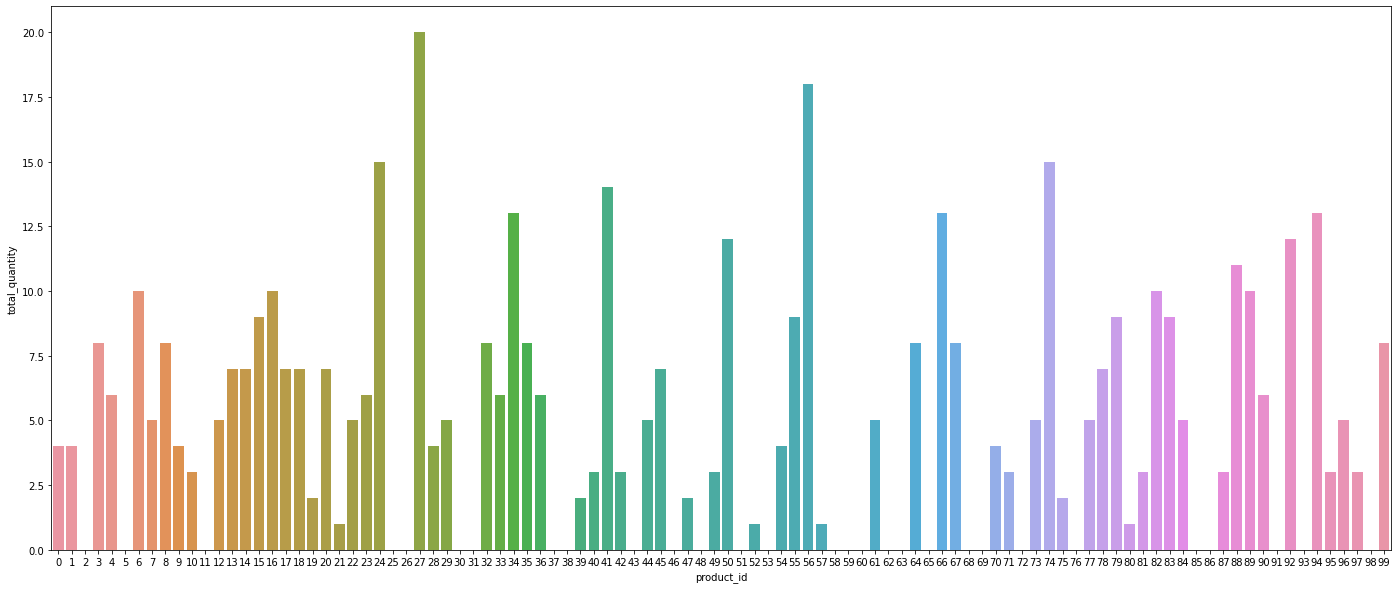

In [253]:
figure(figsize=(24, 10))
ax = sns.barplot(x='product_id', y='total_quantity', data=top_product, order=[_ for _ in range(100)])
        

In [261]:
sales_by_date = final_df.groupby('date', as_index=False) \
    .agg({"quantity": 'sum'}) \
    .rename(columns={"quantity": 'daily_quantity'})
#     найдем продажи по дням 

In [262]:
sales_by_date

,date,daily_quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


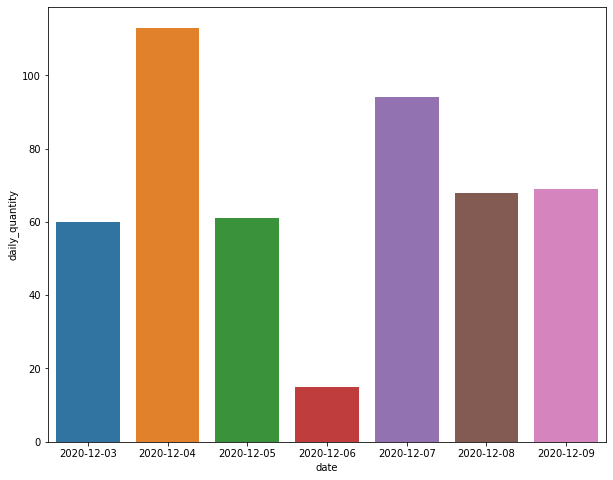

In [268]:
figure(figsize=(10, 8))
ax_1 = sns.barplot(x='date', y='daily_quantity', data=sales_by_date,
                  order=['2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09'])

In [271]:
final_df.shape

(161, 4)

In [272]:
final_df = final_df.drop_duplicates(subset=['name', 'date', 'product_id'])    

In [274]:
final_df.groupby(['name', 'product_id'], as_index=False) \
    .agg({'date': 'count'}) \
    .query('date > 1')
#  найдем , сколько пользователей купили какой-либо товар повторно

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
